In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" # cache_dir indicates where to download data. I specified . which means current directory
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)# untar true will unzip it



228827136/228813984 [==============================] - 2s 0us/step


In [11]:
data_dir

'./datasets/flower_photos'

In [12]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [13]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [14]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8642943283_47e44d049d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg'),
 PosixPath('datasets/flower_photos/roses/15761264350_4caaf080f6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/3971662839_5cb2963b20_n.jpg')]

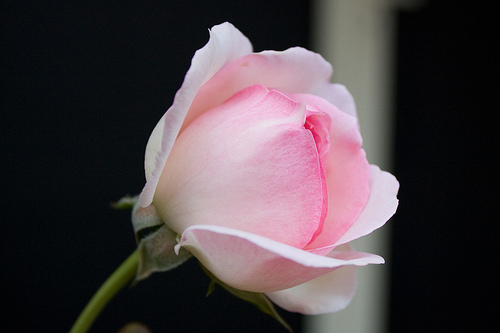

In [15]:
PIL.Image.open(str(roses[1]))

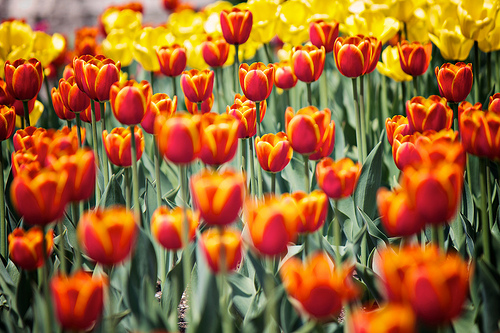

In [16]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape


(240, 240, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [28]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [29]:
X=np.array(X)
y=np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
num_classes=5
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 16s 45ms/step - loss: 1.2913 - accuracy: 0.4506
Epoch 2/30
86/86 [==============================] - 4s 45ms/step - loss: 0.9908 - accuracy: 0.6239
Epoch 3/30
86/86 [==============================] - 4s 45ms/step - loss: 0.8230 - accuracy: 0.6791
Epoch 4/30
86/86 [==============================] - 4s 44ms/step - loss: 0.6398 - accuracy: 0.7616
Epoch 5/30
86/86 [==============================] - 4s 45ms/step - loss: 0.4382 - accuracy: 0.8430
Epoch 6/30
86/86 [==============================] - 4s 45ms/step - loss: 0.2770 - accuracy: 0.9052
Epoch 7/30
86/86 [==============================] - 4s 45ms/step - loss: 0.1511 - accuracy: 0.9593
Epoch 8/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0808 - accuracy: 0.9793
Epoch 9/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0693 - accuracy: 0.9822
Epoch 10/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0517 - accuracy: 0.9876
Epoch 11

In [34]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 1s 32ms/step - loss: 2.4246 - accuracy: 0.6351


[2.4245519638061523, 0.6350762248039246]

In [35]:
predictions = model.predict(X_test_scaled)
predictions

array([[-18.131413 ,   3.2590542,  -3.1508975,  -6.8045564,  -1.0769943],
       [ -4.880507 ,   4.7771626,  -3.8593078,   1.4463096,  -4.3413424],
       [-12.37768  ,  -1.7513494,  16.046223 , -14.362429 , -12.002239 ],
       ...,
       [ -2.1898668,  -9.150881 ,  -8.734669 ,   4.6400084,   5.2408605],
       [ 18.557354 ,   7.4138246, -23.26911  ,  -9.229577 ,  10.306862 ],
       [ -7.6867456, -16.684645 ,   2.0387926,   7.4469504,  10.612896 ]],
      dtype=float32)

In [42]:
score = tf.nn.softmax(predictions[1])

In [43]:
np.argmax(score)

1

In [44]:
y_test[1]

0

In [60]:
### Data Augmentation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(
                                                     180, 
                                                     180,
                                                     3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

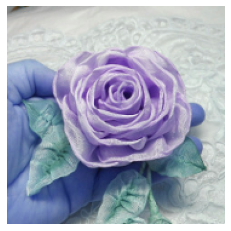

In [61]:
plt.axis('off')
plt.imshow(X[0])


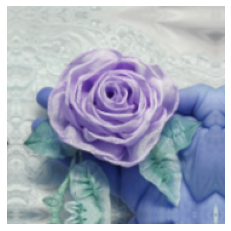

In [62]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [65]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 8s 73ms/step - loss: 1.2963 - accuracy: 0.4222
Epoch 2/30
86/86 [==============================] - 6s 73ms/step - loss: 1.0472 - accuracy: 0.5738
Epoch 3/30
86/86 [==============================] - 6s 73ms/step - loss: 0.9301 - accuracy: 0.6392
Epoch 4/30
86/86 [==============================] - 6s 73ms/step - loss: 0.8564 - accuracy: 0.6642
Epoch 5/30
86/86 [==============================] - 6s 73ms/step - loss: 0.8040 - accuracy: 0.6886
Epoch 6/30
86/86 [==============================] - 6s 73ms/step - loss: 0.7355 - accuracy: 0.7242
Epoch 7/30
86/86 [==============================] - 6s 73ms/step - loss: 0.7084 - accuracy: 0.7271
Epoch 8/30
86/86 [==============================] - 6s 72ms/step - loss: 0.6863 - accuracy: 0.7445
Epoch 9/30
86/86 [==============================] - 6s 73ms/step - loss: 0.6563 - accuracy: 0.7395
Epoch 10/30
86/86 [==============================] - 6s 73ms/step - loss: 0.6487 - accuracy: 0.7525
Epoch 11/

In [66]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 42ms/step - loss: 0.9500 - accuracy: 0.7288


[0.9499785900115967, 0.7287581562995911]